# Data Generation

This notebook is an experiment in generating data for these experiments.

Goals:

- Need data for background and signal
- Generate 5 variables
- Each variable has some discrimination in background and signal
- No variable is correlated with any other variable (future: make correlation explicit)

Would be good to be able to generate an arbitrary number of these variables.

## Setup

In [1]:
import sys
sys.path += ['../abcdlib']
from write_and_run import write_and_run

In [2]:
%%write_and_run ../abcdlib/data_gen.py
# Setup for the script file we are writeing
# WARNING: this is an auto generated file, do not modify, run Data Generation notebook instead!
import numpy as np
import pandas as pd

In [3]:
# Setup for this notebook
import matplotlib.pyplot as plt
import seaborn as sns

## Generation

Generate a certian number of variables as needed, and place them in a signal and background pandas data table.

In [4]:
%%write_and_run -a ../abcdlib/data_gen.py
def generate_gaussian(nvar: int, center: float, n_samples=1000) -> pd.DataFrame:
    'Generate gaussian with width one centered as center'
    data = {
        f'var{i}': np.random.normal(loc=center, size=n_samples)
        for i in range(nvar)
    }
    return pd.DataFrame(data)

In [5]:
%%write_and_run -a ../abcdlib/data_gen.py
def combine(signal: pd.DataFrame, background: pd.DataFrame):
    'Combine signal and background'
    new_s = pd.DataFrame(signal)
    new_s['isSignal'] = 1.0
    new_b = pd.DataFrame(background)
    new_b['isSignal'] = 0.0
    both = pd.concat((new_s, new_b))
    both.reset_index(drop=True, inplace=True)
    return both

In [6]:
signal = generate_gaussian(2, 2.0)
background = generate_gaussian(2, 1.0)
both = combine(signal, background)

In [7]:
both

,var0,var1,isSignal
0,2.659638,0.764751,1.0
1,1.906634,2.435627,1.0
2,2.002536,1.275563,1.0
3,3.289588,1.008617,1.0
4,2.306545,0.712639,1.0
...,...,...,...
1995,1.180418,1.337764,0.0
1996,1.195275,0.938822,0.0
1997,0.871226,1.246470,0.0
1998,2.108307,0.703958,0.0


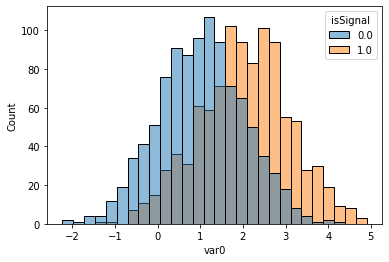

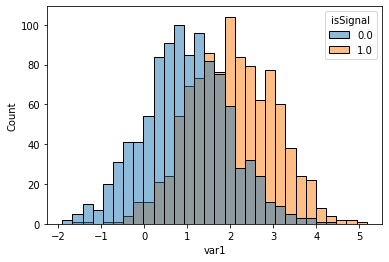

In [8]:
for c in both.columns:
    if 'isSignal' != c:
        sns.histplot(data=both, x=c, hue='isSignal')
        plt.show()

## Check output file

In [9]:
import data_gen